<a href="https://colab.research.google.com/github/ashu433/Machine-Learning-Codes-and-Assignment/blob/main/Machine_Learning_Book_Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [532]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [533]:
Housing_df=pd.read_csv("housing.csv")
Housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [534]:
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


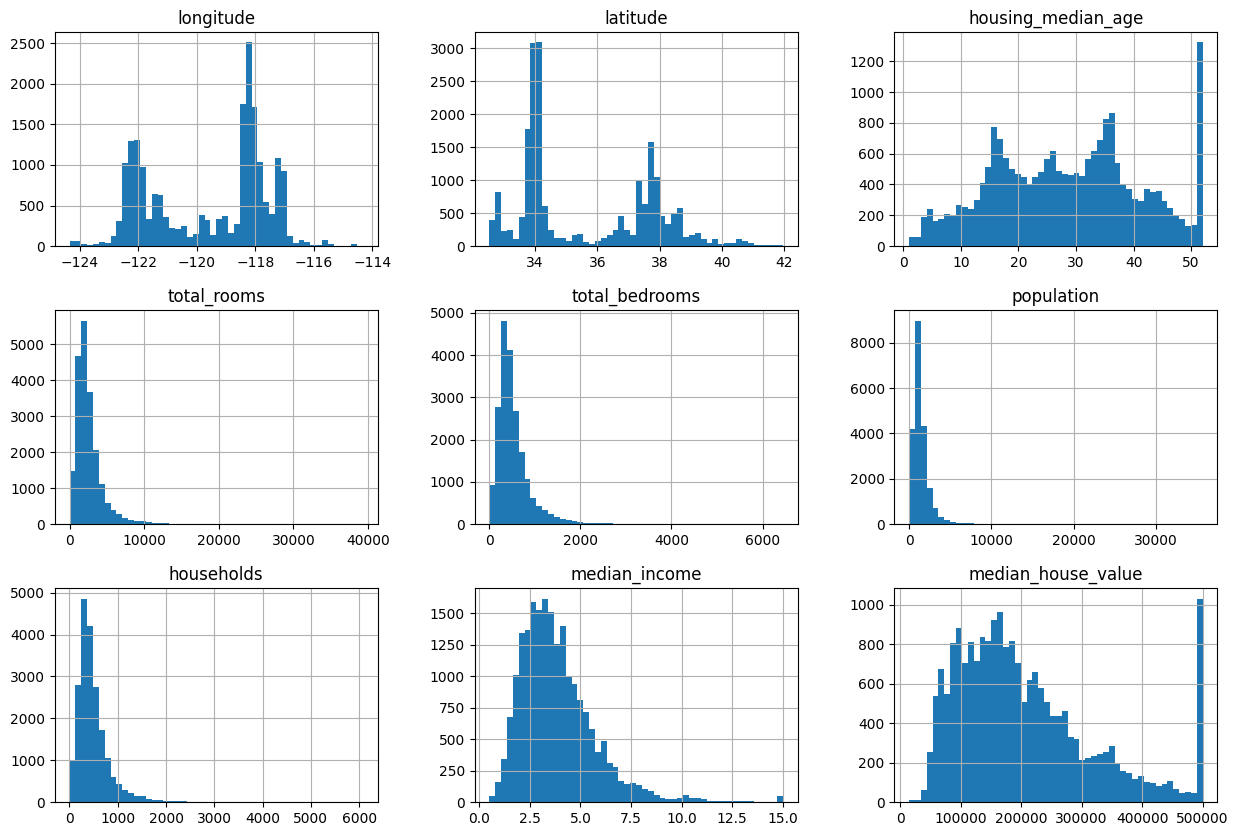

In [535]:
Housing_df.hist(bins=50,figsize=(15,10))
plt.show()

In [536]:
Housing_df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [537]:
Housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [538]:
numeric_features = Housing_df[["longitude", "latitude", "housing_median_age", "total_rooms",
                              "total_bedrooms", "population", "households", "median_income",
                              "median_house_value"]]

# Compute the correlation matrix
correlation_matrix = numeric_features.corr()

# Get the correlation of 'median_house_value' with other features
median_house_value_corr = correlation_matrix["median_house_value"].sort_values(ascending=False)

print(median_house_value_corr)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


<Axes: >

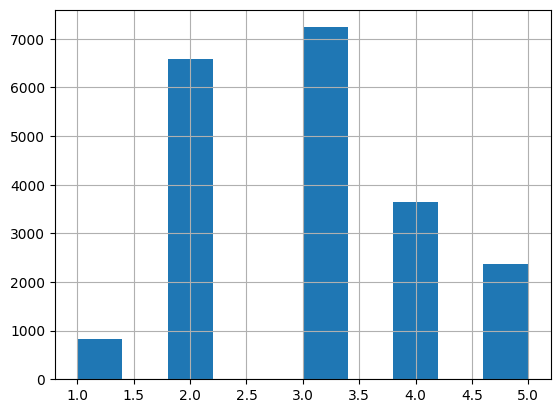

In [539]:
Housing_df["income_cat"] = pd.cut(Housing_df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
Housing_df["income_cat"].hist()

In [540]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Housing_df, Housing_df["income_cat"]):
  strat_train_set = Housing_df.loc[train_index]
  strat_test_set = Housing_df.loc[test_index]

In [541]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [542]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


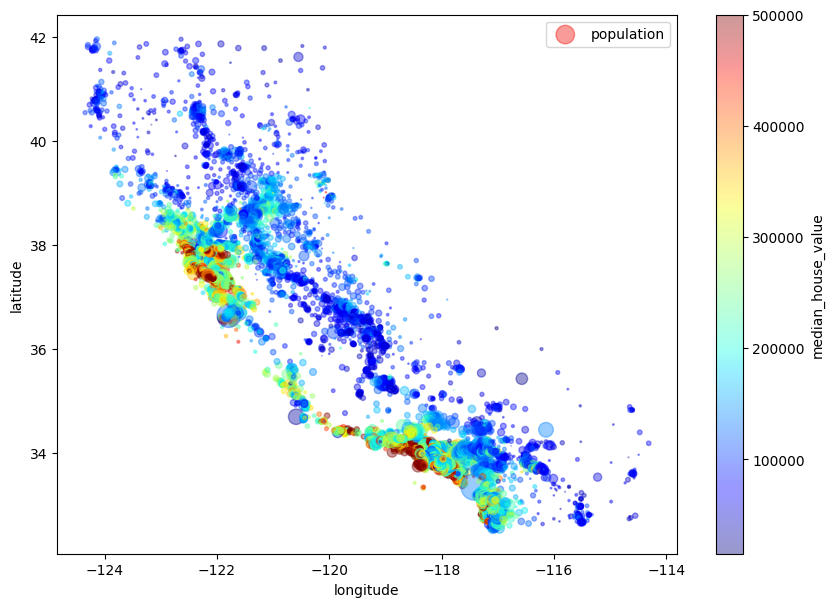

In [543]:
Housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=Housing_df["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [544]:
X_train=Housing_df[["longitude",	"latitude",	"housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income"]]
Y_train=Housing_df[["median_house_value"]]

In [545]:
train_combined = pd.concat([X_train, Y_train], axis=1)

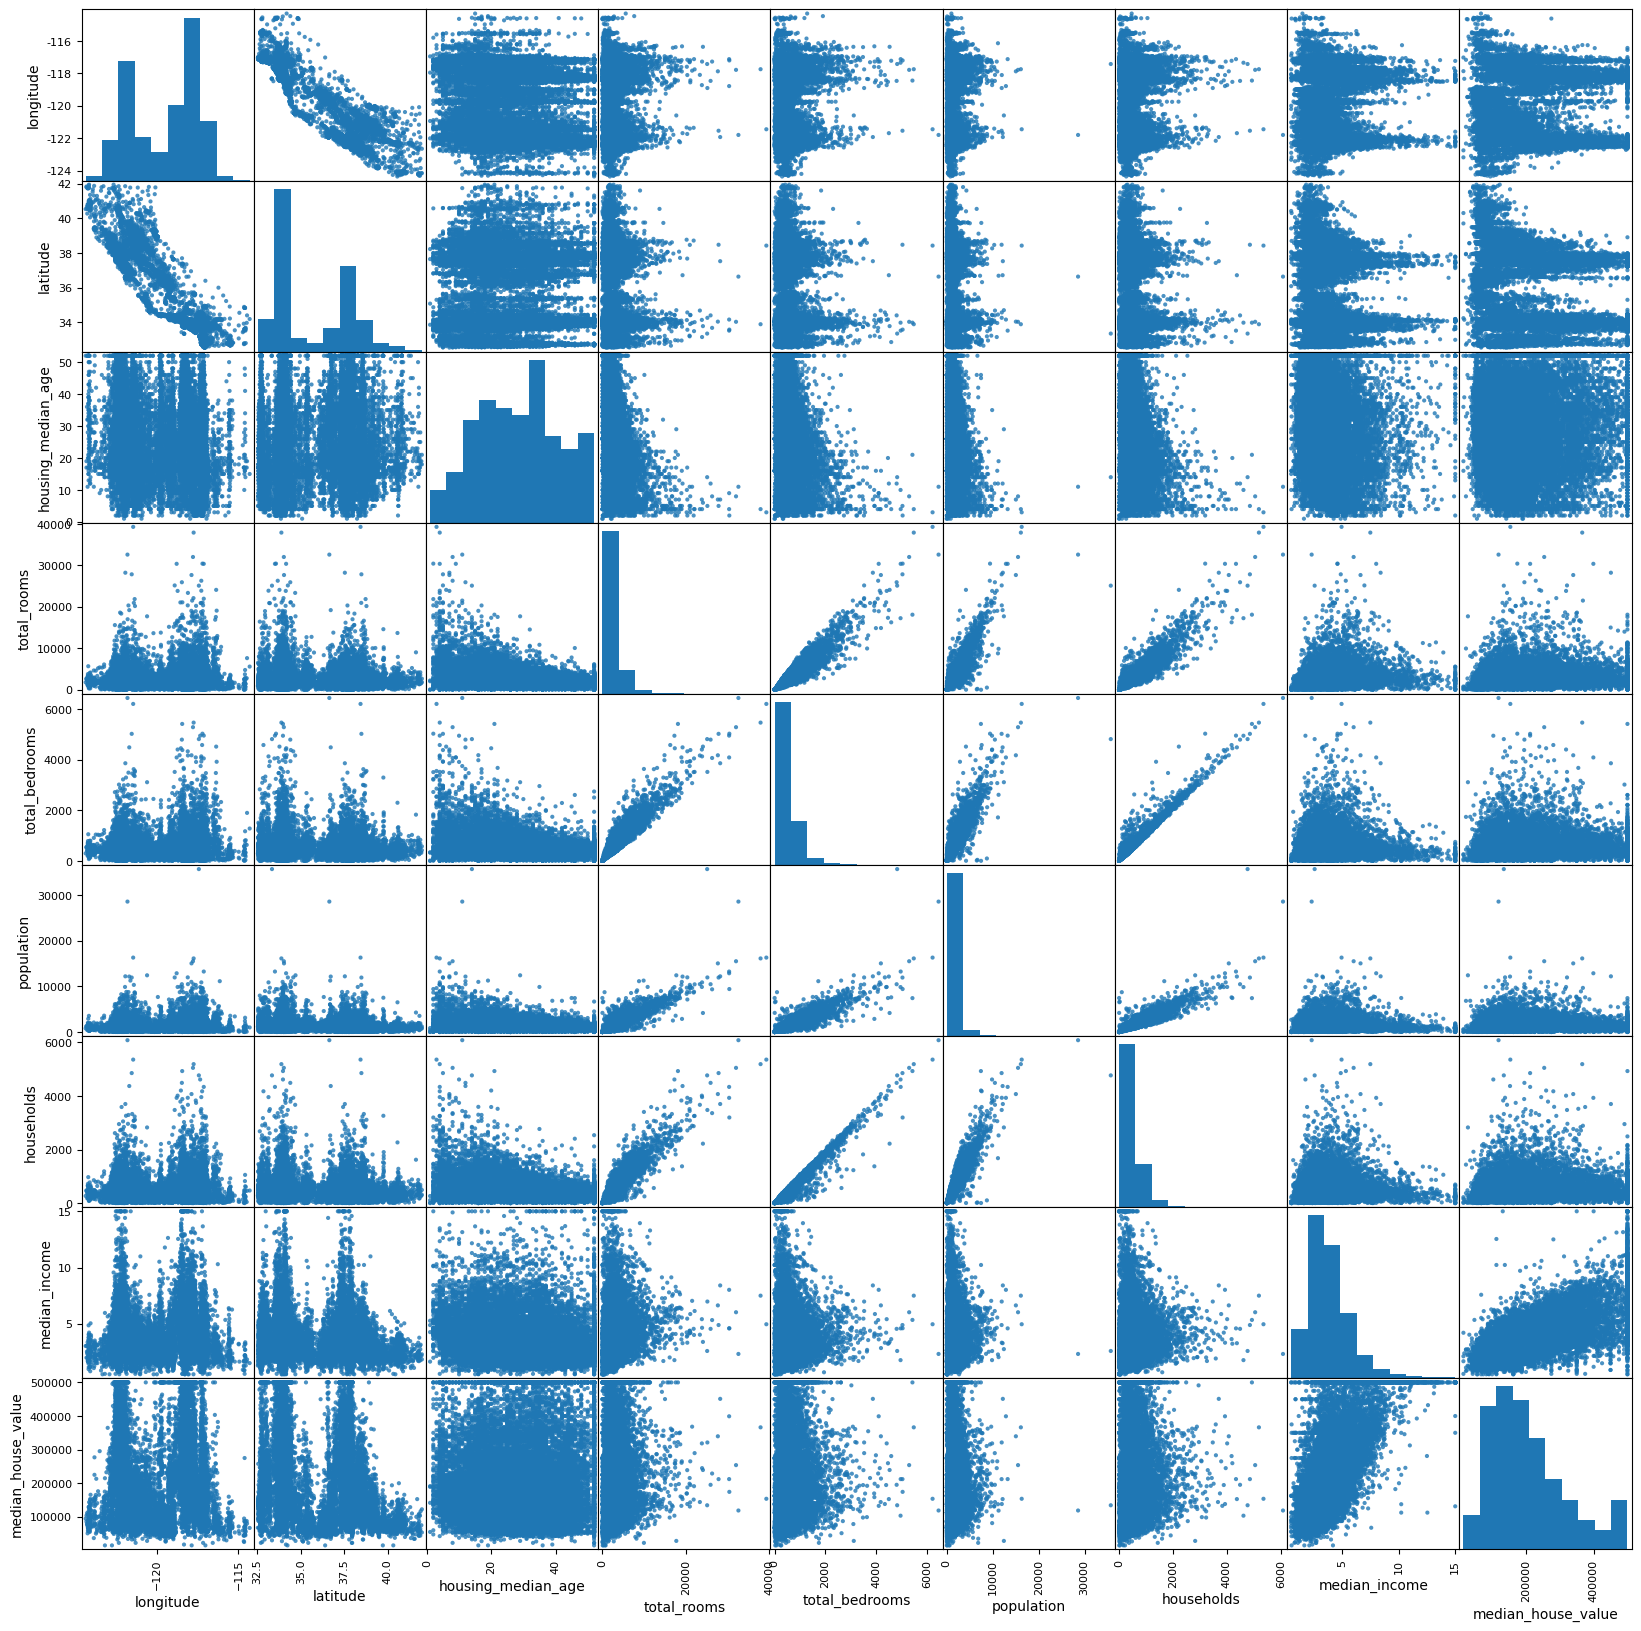

In [546]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_combined, figsize=(20, 20), diagonal='hist', alpha=0.8)

plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

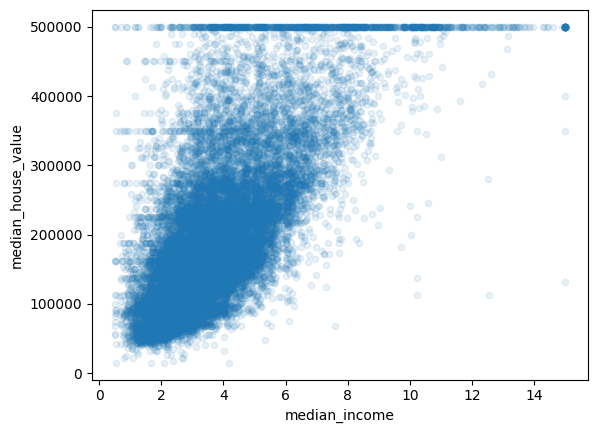

In [547]:
Housing_df.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

<Axes: xlabel='median_income', ylabel='median_house_value'>

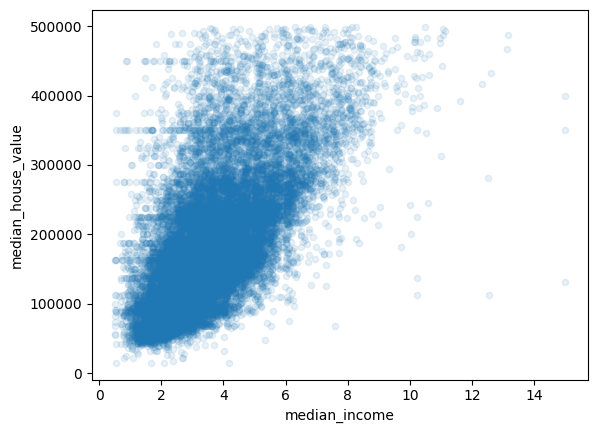

In [548]:
Housing_df_filtered = Housing_df[Housing_df["median_house_value"] < 500000]
Housing_df_filtered.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [549]:
Housing_df["rooms_per_household"] = Housing_df["total_rooms"]/Housing_df["households"]
Housing_df["bedrooms_per_room"] = Housing_df["total_bedrooms"]/Housing_df["total_rooms"]
Housing_df["population_per_household"]=Housing_df["population"]/Housing_df["households"]

In [550]:
Housing_df = Housing_df.drop(columns=["ocean_proximity","income_cat"])

In [551]:
correlation_matrix=Housing_df.corr()
correlation_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


In [552]:
Housing_features_data=strat_train_set.drop("median_house_value",axis=1)
Housing_labels=strat_train_set["median_house_value"].copy()

In [553]:
Housing_features_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [554]:
Housing_features_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [555]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median")

In [556]:
Housing_features_nume=Housing_features_data.drop("ocean_proximity",axis=1)
Housing_features_nume.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [557]:
imputer.fit(Housing_features_nume)

SimpleImputer(strategy='median')

In [558]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [559]:
X=imputer.transform(Housing_features_nume)

In [560]:
Housing_features_nume=pd.DataFrame(X, columns=Housing_features_nume.columns,index=Housing_features_nume.index)

In [561]:
Housing_features_nume.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [562]:
Housing_features_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [563]:
Housing_features_data["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,7277
INLAND,5262
NEAR OCEAN,2124
NEAR BAY,1847
ISLAND,2


In [564]:
Housing_df_encoded = pd.get_dummies(Housing_features_data, columns=["ocean_proximity"], drop_first=True)
Housing_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16354 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   ocean_proximity_INLAND      16512 non-null  bool   
 9   ocean_proximity_ISLAND      16512 non-null  bool   
 10  ocean_proximity_NEAR BAY    16512 non-null  bool   
 11  ocean_proximity_NEAR OCEAN  16512 non-null  bool   
dtypes: bool(4), float64(8)
memory usage: 1.2 MB


In [565]:
Housing_df_encoded = Housing_df_encoded.fillna(0)
Housing_df_encoded = Housing_df_encoded.astype(int)
Housing_df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-121,38,29,3873,797,2237,706,2,1,0,0,0
15502,-117,33,7,5320,855,2015,768,6,0,0,0,1
2908,-119,35,44,1618,310,667,300,2,1,0,0,0
14053,-117,32,24,1877,519,898,483,2,0,0,0,1
20496,-118,34,27,3536,646,1837,580,4,0,0,0,0


# **Pipeline**

In [566]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [567]:
Housing_df=pd.read_csv("housing.csv")
Housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [568]:
Housing_df["income_cat"] = pd.cut(Housing_df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [569]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Housing_df, Housing_df["income_cat"]):
  strat_train_set = Housing_df.loc[train_index]
  strat_test_set = Housing_df.loc[test_index]

In [570]:
strat_train_set.drop(columns=["income_cat"], inplace=True)

In [571]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [572]:
housing_train_num=strat_train_set.drop(columns=["median_house_value"])
housing_train_cat=strat_train_set["ocean_proximity"]
housing_label=strat_train_set["median_house_value"]
housing_train_num.drop(columns=["ocean_proximity"],inplace=True)

In [573]:
housing_train_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [574]:
list(housing_train_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [575]:
housing_label.head()

,median_house_value
12655,72100.0
15502,279600.0
2908,82700.0
14053,112500.0
20496,238300.0


In [576]:
class costum_transformer(BaseEstimator,TransformerMixin):
  def __init__(self,add_bedroom_per_room=True):
    self.add_bedroom_per_room=add_bedroom_per_room

  def fit(self,X,y=None):
    return self

  def transform(self,X):
    rooms_per_houshold=X[:,3]/X[:,6]
    population_per_household=X[:,5]/X[:,6]

    if self.add_bedroom_per_room:
      bedroom_per_room=X[:,4]/X[:,6]

      return np.c_[X,rooms_per_houshold,population_per_household,bedroom_per_room]
    else:
      return np.c_[X,rooms_per_houshold,population_per_household]

In [577]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [578]:
# original_columns = housing_train_num.columns
# extra_columns = ['rooms_per_household', 'population_per_household']
# if costum_transformer().add_bedroom_per_room:
#     extra_columns.append('bedroom_per_room')

# all_columns = list(original_columns) + extra_columns

In [579]:
# all_columns

In [580]:
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', costum_transformer()),
('std_scaler', StandardScaler()),
])
# housing_num_tr = num_pipeline.fit_transform(housing_train_num)

In [581]:
# housing_num_tr

In [582]:
# housing_num_tr_df = pd.DataFrame(housing_num_tr, columns=all_columns)
# housing_num_tr_df.head()

In [583]:
numerical_attribute=list(housing_train_num)
numerical_attribute

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [584]:
from sklearn.preprocessing import OneHotEncoder

In [585]:
numerical_columns = numerical_attribute
categorical_columns = ["ocean_proximity"]

In [586]:
full_pipeline=ColumnTransformer([
    ("numerical_features",num_pipeline,numerical_attribute),
    ("Catogirical Encoding",OneHotEncoder(),["ocean_proximity"]),
])

In [587]:
Final_feature_engineered=full_pipeline.fit_transform(strat_train_set)

In [588]:
Final_feature_engineered

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [589]:
extra_columns = ['rooms_per_household', 'population_per_household']
if costum_transformer().add_bedroom_per_room:
    extra_columns.append('bedroom_per_room')

In [590]:
ohe = full_pipeline.named_transformers_["Catogirical Encoding"]
ohe_feature_names = ohe.get_feature_names_out(categorical_columns)
ohe_feature_names

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [591]:
all_columns = list(numerical_columns) + extra_columns+list(ohe_feature_names)
all_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'bedroom_per_room',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [592]:
Final_feature_engineered.shape

(16512, 16)

In [593]:
Final_feature_engineered_df = pd.DataFrame(Final_feature_engineered, columns=all_columns)

In [594]:
Final_feature_engineered_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedroom_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,0.046298,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,0.018269,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.125247,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,-0.051287,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,0.019188,1.0,0.0,0.0,0.0,0.0
